<font size="6"><b>TWO DICE AND A COIN: PRELUDE TO PROBABILITY THEORY</b></font>

<span style="font-size:3em;">**THIS AND THE NEXT SESSION SERVE AS REFRESHERS AND REFERENCE MATERIAL FOR INTRODUCTION TO PROBABILITY THEORY. THERE ARE MANY SIMULATED EXAMPLES TO CLARIFY THE CONCEPTS.
DON'T TRY TO UNDERSTAND THE COMPLEXITY OF THE CODE, THEY ARE JUST TOOLS TO CREATE THE SIMULATIONS AND VISUALS. PLEASE CONCENTRATE ON THE NARRATIVE, THE FLOW OF IDEAS AND THE INTERPRETATION OF THE EXAMPLES, SIMULATIONS AND THE VISUALS.**</span>

In [ ]:
library(data.table)
library(tidyverse)
library(gtools) # for permutations and combinations
library(MASS) # for fractions
library(ggdag) # for viusalizing trees
library(plotly)

In [ ]:
options(repr.matrix.max.rows=20, repr.matrix.max.cols=15) # for limiting the number of top and bottom rows of tables printed 

In [ ]:
options(htmlwidgets_embed=TRUE)

In [ ]:
options(knitr.kable.max_rows = 10)

![xkcd](../imagesba/seashell.png)

(https://xkcd.com/1236/)

**Note:** For the interactive applications, please:

- Select file browser from the side bar through the symbol: 

- Open the Launcher by hitting the button: 

- Hit "Shiny" button from the Launcher:

  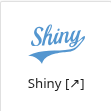

- Navigate to 05_prob_stat_1/apps/

**DISCLAIMER: ALL REFERENCES TO GAMBLING IN THIS COURSE IS FOR THE PURPOSES OF HISTORICAL MENTION AND USEFULNESS OF GAMBLING GAMES TO DEMONSTRATE PROBABILITY CONCEPTS. GAMBLING IS FINANCIALLY RISKY AND DANGEROUS AND USUALLY HAS A NEGATIVE EXPECTED VALUE. GAMBLING CAN BE ADDICTIVE AND IS USUALLY DETRIMENTAL TO YOUR FINANCIAL AND MENTAL HEALTH AND YOUR PERSONAL HAPPINESS. SO DO NOT EVER GAMBLE BUT YOU MAY USE GAMBLING GAMES AS EXAMPLES FOR LEARNING PROBABILITY CONCEPTS**

The examples and simulations in these probability refresher sessions use simplest games of chance such as flipping a coin:

[![korkor](https://img.youtube.com/vi/QuFcGYEQyaY/0.jpg)](https://youtu.be/QuFcGYEQyaY)

Rolling dice:

[![kolp](https://img.youtube.com/vi/iDsHcRKWlm0/0.jpg)](https://youtu.be/iDsHcRKWlm0)

Or drawing cards:

[![tokat](https://img.youtube.com/vi/qZurBr9Mvyc/0.jpg)](https://youtu.be/qZurBr9Mvyc)

# Bernoulli trials

What is probability theory is all about?

> ... probability theory in its essential form: counting the ways things can happen

(McElreath 2020, Statistical Rethinking, page 20)

Let's start with the easiest experiment: A Bernoulli trial.

Don't let the fancy discourage you! We will just flip a coin with a certain "bias"

<img src="../imagesba/1tl.jpg" width="500"/>

Bias of a coin can be interpreted in two ways, but let's stick with the more common terminology:

- A bias of the coin is the probability of heads coming after a flip

So you may ask, what is "probability". We may give two major answers:

- According to the **objective** or **frequentist** approach:

> For an observation of a random phenomenon, the probability of a particular outcome
is the proportion of times that outcome would occur in an indefinitely long sequence
of like observations, under the same conditions.

- According to the **subjective** definition which is mostly used in Bayesian methods:

> The probability of an outcome is the degree of belief that the outcome will occur,
> based on all the available information.

(Agresti and Kateri, Foundations of Statistics for Data Scientists With R and Python, p 29-30)

We will come back to the distinction and usefulness of each method.

First of all, we define a sample space of a chance experiment is a set of elements that one-to-one correspond to all of the possible outcomes of the experiment. In the coin toss example the sample space includes HEAD and TAIL. Sample space is usually denoted by $\Omega$.

The assumptions as to setting up the axioms can be summarised as follows: Let $(\Omega ,F,P)$ be a measure space such that $P(E)$ is the probability of some event $E$. Then  $(\Omega ,F,P)$ is a probability space, with sample space $\Omega$, event space $F$ and probability measure $P$.


Russian mathematician Kolmogorov laid down the foundation of probability theory with three basic axioms:

- Assumption of unit measure: that the probability that at least one of the elementary events in the entire sample space will occur is 1.

$P(\Omega )=1$

- The probability of an event is a non-negative real number:

${\displaystyle P(E)\in \mathbb {R} ,P(E)\geq 0\qquad \forall E\in F}$

where $F$ is the event space.

or

$0 ≤ P(A) ≤ 1$ for each subset $A$ of $\Omega$.

- Assumption of finite additivity: Any finite countable sequence of disjoint sets (synonymous with mutually exclusive events) ${\displaystyle E_{1},E_{2},\ldots ,E_{N}}$ satisfies

${\displaystyle P\left(\bigcup _{i=1}^{N}E_{i}\right)=\sum _{i=1}^{N}P(E_{i})}$

or

$P(A \text{ or } B) = P(A) + P(B)$ if the subsets $A$ and $B$ have no element in common (so-called disjoint subsets).

(Tijms 2023, A First Course In Probability For Computer And Data Science, p. 15; https://en.wikipedia.org/wiki/Probability_axioms)

So let's toss a coin with a bias - probability of heads - of 0.5. Heads are denoted by "1" while tails are "0":

In [ ]:
set.seed(1)
cointoss1 <- rbinom(100, 1, 0.5)

The distribution of H-T values are not exactly 0.5 - 0.5:

In [ ]:
barplot(table(cointoss1))

Let's track the progress of cumulative ratio of heads:

In [ ]:
plot(cummean(cointoss1), type = "l")
abline(h = 0.5, col = "red")

You see that in early flips, the cumulative ratio of heads oscillates wildly around 0.5 while it converges to 0.5 in subsequent flips.

In [ ]:
hist(cummean(cointoss1))

In [ ]:
round(quantile(cummean(cointoss1), c(0, 0.1, 0.25, 0.5, 0.75, 0.9, 1)), 2)

You see that, the cumulative head ratio oscillates between 0.46 and 0.54 80 percent of the time.

Now let's simulate tosses of coins with different bias values simultaneously:

In [ ]:
set.seed(2)
cointoss2 <- lapply(seq(0.1, 0.9, 0.1), function(x) cummean(rbinom(100, 1, x)))

In [ ]:
cointoss2_dt <- mapply(function(x, y) data.table(bias = as.factor(x), ratio = y, trial = seq_along(y)), seq(0.1, 0.9, 0.1), cointoss2, SIMPLIFY = F) %>% rbindlist

In [ ]:
p1 <- cointoss2_dt %>%
ggplot(aes(x = trial, y = ratio, color = bias)) +
geom_line()

In [ ]:
p1

An interactive version of the plot can be created by plotly:

In [ ]:
plotly::ggplotly(p1)

In [ ]:
cointoss2_dt[trial == 7][order(-ratio)]

Although in subsequent flips, the cumulative head ratio converges to the true biases, especially in early runs, the ratios may be misleading. The long run convergence to true parameter values is the subject of Law of Large Numbers, as we will see later.

For example as of the 7th flip, the coin with a bias of 0.8 has a head ratio of 0.57, while the coins with lower biases (0.5, 0.6, and 0.7) all have a higher head ratio.

Note that, this is a simulation where we control the parameters for the data generation process, so WE KNOW THE TRUE BIAS values.

Statistical inference as we will see later, if trying to infer the TRUE PARAMETER VALUES that we don't know using the samples we have.

Next step will be to calculate the probability of getting different ways of heads in a series of coin tosses. But before that let's see the basic rules of counting

# Rules of counting

Let's go through the rules of counting

## Permutations

Suppose we have 5 people standing next to each other (Do you think that the rightmost one, Verbal Kint, is the least menacing one?):

<img src="../imagesba/usual_suspects.jpg" width="1000"/>

Let's say we pick each of these guys from an urn, one by one and without replacement (so each of them appears only once).

In how many ways can we put all five of them in order?

![stacked](../imagesba/stacked_boxes.jpg)

- For the first slot we have 5 options, we pick any of them
- For the second slot, we have 4 options remaning, pick any of them,
- For the third slot, we have 3 options remaining, pick one,
- For the second slot, we have 2 options, pick one,
- For the last slot, we have only one option to go

Mathematically:

$ 5 * 4 * 3 * 2 * 1 = 120 $

In R we can do the calculation:

In [ ]:
prod(5:1)

However we have a general concept for the product of numbers from n to 1 or 1 to n: Factorial

$ {\displaystyle {\begin{aligned}n!&=n\times (n-1)\times (n-2)\times (n-3)\times \cdots \times 3\times 2\times 1\\&=n\times (n-1)!\\\end{aligned}}} $

And the function in R is `factorial. For $5!$:

In [ ]:
factorial(5)

We can also enumerate all permutations:

In [ ]:
perm1 <- permutations(5, 5, repeats.allowed = F)

In [ ]:
dim(perm1)

In [ ]:
perm1

Now let's say, we want to enumerate the permutations of sets of three from these five items:

- For the first slot we have 5 options, select any of them
- For the second slot we have 4 options, select one of them,
- For the third slot we only have 3 options, select one of them.

So mathematically:

$ 5 * 4 * 3 = 60 $

Using the factorial notation:

$ {\displaystyle {\frac {5!}{(5-3)!}}.} $

And the generalized formula for permutations of length n out of k items is:

$ {\displaystyle {\frac {n!}{(n-k)!}}.} $

There is no built in base function for the number of k permutations of n. Let's create a function ourselves:

In [ ]:
perm <- function(n, k) factorial(n) / factorial(n-k)

In [ ]:
perm(1000, 3)

However, this will cause an overflow.

We can write two alternatives that can bypass the integer overflow:

In [ ]:
perml <- function(n, k) exp(lfactorial(n) - lfactorial(n-k))

In [ ]:
permp <- function(n, k) prod(n + 1 - 1:k)

In [ ]:
permp(1000, 3)

In [ ]:
perml(1000, 3)

So the number of length 3 permutations of 5 are:

In [ ]:
perml(5, 3)

Let's enumerate those permutations:

In [ ]:
perm2 <- permutations(5, 3, repeats.allowed = F)

In [ ]:
dim(perm2)

In [ ]:
perm2

## Combinations

Now let's start with the enumerated lenth 3 permutations of 5 but let's sort the values included in each permutation:

In [ ]:
perm3 <- t(apply(perm2, 1, sort)) %>% as.data.table

In [ ]:
perm3 <- perm3[do.call(order, perm3)]

In [ ]:
perm3

We see that, when the values are sorted, the same numbers as a set appear in multiple rows. Let's count the repetitions of each set:

In [ ]:
perm3[, .N, by = names(perm3)]

So there are in fact 10 separate sets each of which appears in 6 rows. Why?

Because certain three items (or people such as Marx, Engels and Lenin) can be ordered (by the uninvited uncle of Marx) in $ 3! = 6 $ ways:

![sarikaya](../imagesba/sarikaya.jpg)

https://komikseyler.com.tr/kategori/naber-dergi/

In order to get to the unordered number of k combinations of n we should divide the permutation count by $ k! $:

$ {\displaystyle \binom{n}{k} = {\frac {n!}{(n-k)! * k!}}.} $

We can write a function for that:

In [ ]:
comb <- function(n, k) factorial(n) / (factorial(n-k) * factorial(k))

In [ ]:
comb(5, 3)

However R already has a built-in function for that:

In [ ]:
choose(5, 3)

**Exercise:**

In a part of one of his previous shows, Cem Yılmaz tells a story from his military service days about how 400 soldiers yell at each other in 40 minutes.

Considering those interactions as undirected (so the direction or order does not matter), calculate the time each interaction (as a combination of length 2) takes in milliseconds:

<video src="../imagesba/combination.mp4"  
       controls width="1000">
</video>

(https://www.youtube.com/@cmylmz?sub_confirmation=1)

(https://tv.apple.com/tr/movie/cmylmz/umc.cmc.37f3qg4fj0ip0nd0j4sosyb07)

**Solution:**

In [ ]:
(40 * 6e4) / choose(400, 2)

The number of combinations of length 0 to n from n are:

In [ ]:
choose(5,0:5)

And the sum of these values are:

In [ ]:
sum(choose(5,0:5))

Which is basically $ 2^n $, the size of the power set (set of all subsets).

# Basic probability calculus

In the following examples, for the purposes of simplicity the possible outcomes are equiprobable. So coin, dice and card decks are fair, all possible outcomes have the same equal probability.

Later on when we introduce the concept of random variables and probability distributions, this assumption will be relaxed.

## Complement, sum rule, product rule and conditional probability

### Independent events

To illustrate these rules, we will go through two example.

In the first one we roll two dice. The outcomes of two dice are totally independent from each other

- A: Getting a 6 in the first die
- B: Getting a 6 in the second die

Let's first enumerate all possible pairs of outcomes:

In [ ]:
dice1 <- permutations(6, 2, repeats.allowed = T)

In [ ]:
colnames(dice1) <- LETTERS[1:2]

In [ ]:
dice1

But we are more interested in whether we have 6 so let's have a boolean matrix for that:

In [ ]:
dice2 <- dice1 == 6

In [ ]:
dice2

$P(A)$ is:

In [ ]:
fractions(1 / 6)

Confirm from the matrix:

In [ ]:
fractions(mean(dice2[, "A"]))

$P(B)$ is:

In [ ]:
fractions(1/ 6)

Confirm from the matrix:

In [ ]:
fractions(mean(dice2[, "B"]))

Now the complement of A, "not getting a 6 in the first die", denoted by:

${\displaystyle P(A')=1-P(A)}$ is:

In [ ]:
fractions(1 - 1/6)

Confirm:

In [ ]:
fractions(mean(!dice2[, "A"]))

Now the complement of B, "not getting a 6 the second die", denoted by:

${\displaystyle P(B')=1-P(B)}$ is:

In [ ]:
fractions(1 - 1/6)

Confirm:

In [ ]:
fractions(mean(!dice2[, "B"]))

Now the probability of B, given A or conditional on A, $P(B|A)$ is:

In [ ]:
fractions(1/6)

Since two events are independent

Let's confirm:

In [ ]:
dice2[dice2[, "A"],]

In [ ]:
fractions(mean(dice2[dice2[, "A"],"B"]))

Having a six in the first die AND in the first die, $P(A \text{ and } B)$ alternatively $P(A \cap B)$ is:

$P(A \cap B) = P(A) * P(B | A)$

In [ ]:
fractions(1/6 * 1/6)

In [ ]:
fractions(sum(apply(dice2, 1, all)) / 36)

Having a six in the first die OR in the first die, $P(A \text{ or } B)$ alternatively $P(A \cup B)$:

$P(A) + P(B) - P(A \cap B)$

In [ ]:
fractions(1/6 + 1/6 - 1/36)

In [ ]:
fractions(mean(apply(dice2, 1, any)))

### Dependent events

Now let's assume we have a deck of 6 cards, numbered from 1 to 6 and we pick two cards one by one, without replacing the first card back to the deck. Now the events are:

- A: Drawing 6 as the first card
- B: Drawing 5 as the second card

To illustrate the calculations better we can add two more events:

- C: Drawing 5 as the first card
- D: Drawing 6 as the second card

We will demonstrate the probabilities using three methods:

- Direct calculation
- Enumeration of all possible permutations
- Simulation (approximate results)

The enumerated permutations are:

In [ ]:
deck1 <- permutations(6, 2, repeats.allowed = F)

In [ ]:
deck2 <- t(t(deck1) == c(6, 5))

In [ ]:
colnames(deck2) <- LETTERS[1:2]

In [ ]:
deck2

And a simulation:

In [ ]:
set.seed(5)
simul1 <- t(replicate(1e4, sample(6, 2)))

In [ ]:
simul2 <- t(t(simul1) == c(6, 5))

In [ ]:
colnames(simul2) <- LETTERS[1:2]

$P(A)$ is:

In [ ]:
fractions(1 / 6)

Confirm from the matrix:

In [ ]:
fractions(mean(deck2[, "A"]))

And from the simulation:

In [ ]:
fractions(round(mean(simul2[, "A"]), 3), max.denominator = 6)

Now, $P(B)$ is more tricky:

There are two alternative routes to B:

- Have a 5 in the first round ($C$)
- Not have a 5 in the first round ($C'$)

Let's represent the idea as a directed acyclic graph (DAG).

Here $\Omega$ is the whole sample space:

In [ ]:
dag1 <- dagify(BC ~ C,
                      BCc ~ Cc,
                      C ~ omega,
                      Cc ~ omega,
                      labels = c("BC" = "B|C (0/5)",
                                 "C" = "C (1/6)",
                                 "BCc" = "B|C' (1/5)",
                                 "Cc" = "C' (5/6)",
                                "omega" = "\u03A9")) %>%
tidy_dagitty(layout = "tree")

In [ ]:
suppressWarnings(ggdag(dag1, text = FALSE, use_labels = "label") +
  theme_void())

So:

$P(B) = P(C)P(B|C) + P(C')P(B|C')$

In [ ]:
fractions(1/6*0/5 + 5/6*1/5)

From the table:

In [ ]:
fractions(mean(deck1[,1] == 5)) * # P(C)
fractions(mean(deck1[deck1[,1] == 5, 2] == 5)) + # P(B|C)
fractions(mean(deck1[,1] != 5)) * # P(C')
fractions(mean(deck1[deck1[,1] != 5, 2] == 5)) # P(B|C')

Or more concisely:

In [ ]:
fractions(mean(deck1[, 2] == 5))

And from the simulation:

In [ ]:
fractions(round(mean(simul2[, "B"]), 3), max.denominator = 6)

While the concise and longer calculations lead to the same result, it is usually useful to conduct the longer way in order to confirm the concise results.

Now the probability of B, given A or conditional on A ($P(B|A)$), or more precisely

- Given we have a 6 in the first round,
- The probability of having a 5 in the second round

is:

In [ ]:
fractions(1/5)

This is different than the previous case where two events were independent since they were sampled from different dice.

When we condition on the fact that 6 is drawn as the first card, there are 5 cards left so the probability of having 5 is 1/5.

This is different than P(B), since in calculating P(B) we also considered the possibility of drawing 5 in the first round.

Let's confirm from the deck:

In [ ]:
fractions(mean(deck2[deck2[, "A"],"B"]))

And the simulation:

In [ ]:
fractions(round(mean(simul2[simul2[, "A"],"B"]), 1), max.denominator = 6)

Drawing six in the first round AND drawing 5 in the second round, $P(A \text{ and } B)$ alternatively $P(A \cap B)$ is:

$P(A \cap B) = P(A) * P(B | A)$

For the first card we have 6 options, while for the first card we have only 5 options remaning, given we have already drawn 6:

In [ ]:
fractions(1/6 * 1/5)

This can be deduced from the fact that there 30 distinct 2-permutations of 6 cards:

In [ ]:
fractions(1/perm(6, 2))

From the deck permutations:

In [ ]:
fractions(mean(deck2[, "A"])) * # P(A)
fractions(mean(deck2[deck2[, "A"],"B"])) # P(B|A)

Or more concisely:

In [ ]:
fractions(mean(apply(deck2, 1, all)))

And from the simulation:

In [ ]:
fractions(round(mean(apply(simul2, 1, all)), 4))

Drawing a six in the first round OR five in the second round, $P(A \text{ or } B)$ alternatively $P(A \cup B)$:

$P(A) + P(B) - P(A \cap B)$

In [ ]:
fractions(1/6 + 1/6 - 1/30)

From the table:

In [ ]:
fractions(mean(apply(deck2, 1, any)))

From the simulation:

In [ ]:
fractions(round(mean(apply(simul2, 1, any)),1))

## Joint probability and marginal probability

The probability that multiple events occur - or multiple variables have certain values - denoted by $P(A \cap B) = P(A)P(B|A)$ is also called **joint probability**

When we have multiple events, the probability of one of them without referencing the other events is called **marginal distribution**

So in our previous example, while we had two events, $A$ and $B$, the $P(A)$ and $P(B)$ are the marginal probabilities of $A$ and $B$ respectively.

## Complement rule for advanced problems: Birthday example

In some seemingly complex probability problems involving calculating the probability that an event happens ($P(E)$), the problem can be reformulated such that the probability that the even does not happen ($P(E')$) is calculated first and its complement is then taken ($1 - P(E')$)

A commonly cited example is the birthday problem:

> What is the probability that two or more
people share a birthday in a randomly formed group of m people
(no twins)? To simplify the analysis, it is assumed that the year has
365 days (February 29 is excluded) and that each of these days is
equally likely as birthday.

(Tijms 2023, A First Course In Probability For Computer And Data Science, p. 10)

So, let's first calculate the probability that NOONE shares a birthday among m people. For a concrete example let's take m as 5:

The first person can have any day:

In [ ]:
fractions(365/365)

The second person has 365 - 1 options:

In [ ]:
fractions((365 - 1) / 365)

The third person:

In [ ]:
fractions((365 - 2) / 365)

The fourth person:

In [ ]:
fractions((365 - 3) / 365)

And the fifth person:

In [ ]:
fractions((365 - 4) / 365)

So the joint probability of each of 5 people having a distinct birthday is:

In [ ]:
prod((365 - 0:4) / 365)

And at least 2 people sharing a birthday is:

In [ ]:
1 - prod((365 - 0:4) / 365)

Let's make it a function:

In [ ]:
birthprob <- function(x) 1 - prod((365 - 0:(x - 1)) / 365)

For 50 people, the probability that at least 2 people share a birthday is:

In [ ]:
birthprob(50)

## Bayes rule

We can think that the joint probability is commutative so:

$P(A \cap B) = P(B \cap A)$

and hence

$P(A) * P(B | A) = P(B) * P(A | B)$

Rearranging the terms:

${\displaystyle P(B | A) = \frac{P(B)P(A | B)}{P(A)}}$

Which is the famous Bayes' rule for "inverse probability"

Hidden behind these symbols, the true meaning can be understood as such:

- Let B be some hypothesis we want to test the probability of. We cannot directly observe hypothesis so we have to make an inference about it. For example the event of raining tomorrow may be an hypothesis, we cannot directly observe tomorrow's rain today.
- Let A be some evidence or data related to the hypothesis. We directly observe and measure the evidence, such as the meteorological conditions today


So the Bayes's rule in plain English is:

${\displaystyle\begin{align}
The\ (posterior)\\
probability\ of\ hypothesis
\\ given\ evidence
\end{align} =
\frac{
\begin{align}
The\ prior\ probability && * && The\ likelihood\ of\ evidence\\
of\ hypothesis && && given\ the\ hypothesis
\end{align}}{\mathit{The\ probability\ of\ evidence}}}$

In Bayesian updating, we begin with a prior probability for the hypothesis. With additional evidence gathered, the prior probability is updated to infer the posterior probability

Ususally we have two or more alternative hypotheses and probability of evidence is weighted by the prior probabilities of those hypotheses.

Let's assume that the alternative hypothesis of B is B'. Then $P(A)$ is:

$P(A) = P(B)P(A | B) + P(B')P(A | B')$

### Test for disease example

A very famous type of problem in Bayesian inference is the disease test problem.

Here our subject is a rare disease and a less than perfect diagnosis test for the disease.

We start from 
- The probability of disease
- Probability of true positive result given the disease
- Probability of false positive result given the absence of disease

and we want to infer the probability of having the disease given a positive test result.

> Someone visits the doctor because he fears having a
very rare disease. This disease occurs in only 0.1% of the population.
The doctor proposes a test that correctly identifies 99% of the people
who have the disease, and only incorrectly identifies 1% of the people
who don’t have the disease.
Suppose the person in question has
tested positive.
What is the probability that he actually has the
disease? How does the answer change if a second
independent test is also positive?

(Tijms 2023, A First Course In Probability For Computer And Data Science, Problem 2.29, p 38)

In [ ]:
pb <- 0.001 # P(B), the prior probability of disease hypothesis

In [ ]:
pab <- 0.99 # P(A|B), the probability of true positive result given disease

In [ ]:
panb <- 0.01 # P(A|B'), the probability of false positive result given absence of disease - the alternative hypothesis

In [ ]:
pnb <- 1 - pb # P(B'), the probability of not having the disease

We want to find out:

${\displaystyle P(B | A) = \frac{P(B)P(A | B)}{P(B)P(A | B) + P(B')P(A | B')}}$

In [ ]:
pba <- (pb * pab) / (pb * pab + pnb * panb)

In [ ]:
pba # P(B|A), the posterior probability of having the disease given a positive test result

So for a quite rare disease, even a quite accurate test points at a correct positive diagnosis only 9.02% of the time in this example

Now the usefulness of Bayesian methods lies in the fact that, our posterior can serve as the new prior, in case we continue collecting new evidence.

Let's come to the second part of the problem. We are conducting a second test and the result is positive again.

In [ ]:
pb <- pba # the previous posterior P(B|A) becomes the new prior P(B)
pb

In [ ]:
pnb <- 1 - pb # the new P(B')
pnb

In [ ]:
pba <- (pb * pab) / (pb * pab + pnb * panb)

In [ ]:
pba

After the second positive result, our new posterior probability of having the disease is now 90.75%

### Monty Hall problem

<img src="../imagesba/montyhall.jpg" width="500"/>

A famous problem which caused quite a lot of discussions in the past goes like that:

> Suppose you’re on a game show, and you’re given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what’s behind the doors, opens another door, say No. 3, which has a goat. He then says to you, ‘Do you want to pick door No. 2?’ Is it to your advantage to switch your choice?”

(https://blogs.cornell.edu/info2040/2022/11/10/the-monty-hall-problem-using-bayes-theorem/)

Let's formalize this problem within Bayesian context

Suppose we have three alternative hypotheses, each equally likely a priori:

- Car is behind door A, $P(A) = 1/3$
- Car is behind door B, $P(B) = 1/3$
- Car is behind door C, $P(C) = 1/3$    

Let's say we pick the door A, and the host - named Monty - reveals the goat behind door B. Note that Monty always open a door that hides a goat behind, not a car!

The likelihood of the evidence (goat behind opened door B) given three hypotheses are as follows:

- $P(openB | A) = 1/2$ since the car is behind A and we have already chosen door A, Monty should open either door B or door C, with goats behind, equally likely
- $P(openB | B) = 0$ since the car is behind B there is no way Monty can open that door
- $P(openB | C) = 1$ since the car is behind C and we opened door A, the only option for Monty is to open door C

So the formulations is:

The probability of opening door B:

$P(openB) = P(openB|A)P(A) + P(openB|B)P(B) + P(openB|C)P(C)$

The probability of car behind A given B is opened:

${\displaystyle P(A | openB) = \frac{P(openB|A)P(A)}{P(openB)}}$

The probability of car behind C given B is opened:

${\displaystyle P(C | openB) = \frac{P(openB|C)P(C)}{P(openB)}}$

First the priors for hypotheses:

In [ ]:
priorMH <- fractions(rep(1/3, 3))
names(priorMH) <- LETTERS[1:3]
priorMH

The likelihoods, probability of evidence conditional on hypotheses:

In [ ]:
likelihoodOB <- fractions(c(1/2, 0, 1))
names(likelihoodOB) <- LETTERS[1:3]
likelihoodOB

Probability of evidence:

In [ ]:
OB <- sum(priorMH * likelihoodOB)
OB

And the posterior probabilities of hypotheses given the evidence:

In [ ]:
posteriorMH <- priorMH * likelihoodOB / OB
names(posteriorMH) <- LETTERS[1:3]

In [ ]:
posteriorMH

As you see, sticking with door A, chance of revealing the car is $1/3$ while switching the door to C will double the chance to $2/3$

Why?

Because Monty does not open a door randomly, he opens a door which reveals a goat behind CONDITIONING on the hypotheses (whether car is behind) so while the priors are equiprobable the likelihoods are not!

### Bayesian resources

Two great non-technical introductions to Bayesian methods are:

- "The theory that would not die" by Sharon Bertsch McGrayne (2011)
- "Bernoulli's Fallacy: Statistical Illogic and the Crisis of Modern Science" by Aubrey Clayton (2021)

Two great technical resources on Bayesian methods are:

- "Statistical rethinking: a Bayesian course with examples in R and Stan" by Richard McElreath (2020)
- "Doing Bayesian data analysis: a tutorial with R, JAGS, and Stan" by John K. Kruschke (2015)

At first you may be reluctant to step outside the comfort zone provided by frequentist statistic methods, but the more you learn about Bayesian methods, the more you will love them:

<video src="../imagesba/pekyakinda.mp4"  
       controls width="1000">
</video>

(https://www.youtube.com/@fikirsanat?sub_confirmation=1)

(https://www.netflix.com/tr-en/title/80231065)

(https://tvplus.com.tr/film-izle/pek-yakinda--146942564)

(https://tv.apple.com/tr/movie/pek-yak%C4%B1nda/umc.cmc.47tfbqdubgsyanfuh6m97eonu)



# Random variable, expected value, variance, standard deviation

Now let's come to the concept of random variable, revisiting chance experiment and sample space concepts:

> Formally, a random variable is defined as a function
that assigns a numerical value to each element of the sample space.
The observed value, or realization, of a random variable is completely
determined by the realized outcome of the chance experiment, and
consequently, probabilities can be assigned to the possible values of
the random variable. A random variable gets its value only after the
chance experiment has been done. Before the chance experiment is
done, you can only speak of the probability that the random variable
will take on a particular value.

> Discrete random variables take on a discrete number of values

> Continuous random variables take on a continuum of values.

(Tijms 2023, A First Course In Probability For Computer And Data Science, p. 47-48)

Probability mass function is the probability distribution of a discrete random variable, and provides the possible values and their associated probabilities.

The probabilities associated with all (hypothetical) values must be non-negative and sum up to 1,

${\displaystyle \sum _{x}p_{X}(x)=1}$

and

${\displaystyle p_{X}(x)\geq 0.}$

(https://en.wikipedia.org/wiki/Probability_mass_function)

You can recall the last two formulas from the probability axioms at the beginning of the notebook.

**Example:**

What is the probability mass function of the random variable X denoting the sum of one roll of two fair dice?

(Tijms 2023, A First Course In Probability For Computer And Data Science, p. 48)

We can enumarate and count the possible sums:

Get sums of 36 2-permutations:

In [ ]:
dicevals <- permutations(6, 2, repeats.allowed = T)

In [ ]:
sums <- rowSums(dicevals)

Get the prob table in fractions:

In [ ]:
probs <- fractions(prop.table(table(sums)))

No need for the dimension name:

In [ ]:
names(dimnames(probs)) <- NULL

In [ ]:
probs

They sum up to 1:

In [ ]:
sum(probs)

And we see that the probability mass function has a symmetric triangle shape, maximum in the middle:

In [ ]:
plot(names(probs), as.numeric(probs), type = "l")

We can also confirm by simulation:

In [ ]:
set.seed(5)
dicesimul <- matrix(sample(6, 1e5, replace = T), ncol = 2)

In [ ]:
dicesimulsum <- rowSums(dicesimul)

In [ ]:
table(dicesimulsum)

In [ ]:
hist(dicesimulsum)

## Expected value

For a discrete random variable with n distinct values the **expected value** (or *mean* or *average*) is the sum of the values weighted by their respective probabilities:

${\displaystyle \operatorname {E} [X]=\sum _{i=1}^nx_{i}\,p_{i},}$

For our previous example, the expected value is:

In [ ]:
sum(probs * 2:12)

Which is where the tip of the triangle denoting the probability mass functions is

A useful property of expected value is the linearity of expectations:

> For any random variables 
${\displaystyle X}$ and ${\displaystyle Y}$ and a constant constant 
${\displaystyle a,}$
$${\displaystyle {\begin{aligned}\operatorname {E} [X+Y]&=\operatorname {E} [X]+\operatorname {E} [Y],\\\operatorname {E} [aX]&=a\operatorname {E} [X],\end{aligned}}}$$

(https://en.wikipedia.org/wiki/Expected_value) 

Let's define some constants for two columns denoting the values of each die:

In [ ]:
diceconst <- c(3, 4)

Let's get the expected values of each column:

In [ ]:
meandice <- colMeans(dicevals)
meandice

Let's define a third column a linear combination of these two columns multiplied with the constants:

In [ ]:
newcol <- rowSums(t(t(dicevals) * diceconst))

Calculate the expected value of this new column:

In [ ]:
mean(newcol)

And confirm by the linearity of expectations:

In [ ]:
sum(meandice * diceconst)

This property is very useful and will be a basis of the distribution of sample means and the square root law later in hypothesis testing and inference

## Law of large numbers

The law of large numbers is a mathematical law that states that the average of the results obtained from a large number of independent random samples converges to the true value, if it exists:

${\displaystyle {\overline {X}}_{n}={\frac {1}{n}}(X_{1}+\cdots +X_{n})}$

converges to the expected value:

${\displaystyle {\overline {X}}_{n}\to \mu \quad {\textrm {as}}\ n\to \infty .}$

(https://en.wikipedia.org/wiki/Law_of_large_numbers)

The previous example of coin tosses showed that convergence to some extent but in that simulation the number of trials were capped at 100. The simulated dice rolls data can demonstrate the fact since the number of rolls is 10,000. 

In [ ]:
plot(cummean(dicesimulsum), type = "l")
abline(h = 7, col = "red")

## Variance and standard deviation

Variance is a measure of dispersion, meaning it is a measure of how far a set of numbers is spread out from their average value.

The variance of a random variable ${\displaystyle X}$ is the expected value of the squared deviation from the mean of 
${\displaystyle X}$, ${\displaystyle \mu =\operatorname {E} [X]}$

${\displaystyle {\begin{aligned}\operatorname {Var} (X)&=\operatorname {E} \left[(X-\mu )^{2}\right]\\[4pt]&=\operatorname {E} \left[X^{2}\right]-\operatorname {E} [X]^{2}\end{aligned}}}$

(https://en.wikipedia.org/wiki/Variance)

For the case of dice sums:

The expected value is:

In [ ]:
meandice <- sum(probs * 2:12)
meandice

And the variance:

In [ ]:
vardice <- sum(probs * (2:12)^2) - meandice^2
vardice

Later on when we are discussing the topics of sampling and hypothesis testing, the difference between the definition of sample and population variances will also be shown. For the time being, we are doing the calculations on the whole sample space, so the variance we are calculating is the population variance.

The **standard deviation** (SD) is obtained as the square root of the variance. While variance is the average of squared differences between the values and the mean, standard deviation is is expressed in the same unit as the data.

(https://en.wikipedia.org/wiki/Standard_deviation)

In [ ]:
sqrt(as.numeric(vardice))

Before we mention the properties of variance, it is useful to define covariance.

Covariance is a measure of the joint variability of two random variables.

Covariance is defined as the expected value (or mean) of the product of their deviations from their individual expected values:

${\displaystyle {\begin{aligned}\operatorname {cov} (X,Y)&=\operatorname {E} \left[\left(X-\operatorname {E} \left[X\right]\right)\left(Y-\operatorname {E} \left[Y\right]\right)\right]\\&=\operatorname {E} \left[XY\right]-\operatorname {E} \left[X\right]\operatorname {E} \left[Y\right].\end{aligned}}}$

(https://en.wikipedia.org/wiki/Covariance)

A related concept is correlation coefficient.

(Pearson) correlation coefficient is a correlation coefficient that measures linear correlation between two sets of data.

It is the ratio between the covariance of two variables and the product of their standard deviations; thus, it is essentially a normalized measurement of the covariance, such that the result always has a value between −1 and 1. 

${\displaystyle \rho _{X,Y}={\frac {\operatorname {cov} (X,Y)}{\sigma _{X}\sigma _{Y}}}}$

where

- ${\displaystyle \operatorname {cov} }$ is the covariance
- ${\displaystyle \sigma _{X}}$ is the standard deviation of $X$
- ${\displaystyle \sigma _{Y}}$ is the standard deviation of $Y$
  
(https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

Let's start with two dice independently rolled:

In [ ]:
dicex1 <- permutations(6, 2, repeats.allowed = T)

Means of each dice:

In [ ]:
dicemean1 <- colMeans(dicex1)
dicemean1

With the first equation:

In [ ]:
dicecov1a <- sum(apply(t(t(dicex1) - dicemean1), 1, prod))
dicecov1a

With the second equation:

In [ ]:
dicecov1b <- mean(apply(dicex1, 1, prod)) - prod(dicemean1)
dicecov1b

The standard deviations are:

In [ ]:
dicesd1 <- sqrt(colMeans(t(t(dicex1) - dicemean1)^2))
dicesd1

And the correlation coefficient between the dice outcomes is:

In [ ]:
dicecov1b / prod(dicesd1)

This is quite obvious since the outcome of the two dice are totally independent.

Now let's consider the case of drawing cards from the deck without replacement. Let's first start with a deck of 6 cards:

In [ ]:
dicex2 <- permutations(6, 2, repeats.allowed = F)

Expected values are:

In [ ]:
dicemean2 <- colMeans(dicex2)
dicemean2

Covariance is:

In [ ]:
dicecov2b <- mean(apply(dicex2, 1, prod)) - prod(dicemean2)
dicecov2b

The standard deviations are:

In [ ]:
dicesd2 <- sqrt(colMeans(t(t(dicex2) - dicemean2)^2))
dicesd2

And the correlation coefficient between the dice outcomes is:

In [ ]:
dicecov2b / prod(dicesd2)

Since two draws are dependent, the covariance and correlation is none zero now. When a higher value is drawn first, the second card has a lower value and vice versa, so the correlation coefficient is negative

The correlation between the values of two draws are negative but the negative relationship is not very strong as can be seen from the scatterplot below:

In [ ]:
plot(dicex2)

Now, let's try a smaller deck of cards:

In [ ]:
dicex3 <- permutations(3, 2, repeats.allowed = F)

Expected values are:

In [ ]:
dicemean3 <- colMeans(dicex3)
dicemean3

Covariance is:

In [ ]:
dicecov3b <- mean(apply(dicex3, 1, prod)) - prod(dicemean3)
dicecov3b

The standard deviations are:

In [ ]:
dicesd3 <- sqrt(colMeans(t(t(dicex3) - dicemean3)^2))
dicesd3

And the correlation coefficient between the dice outcomes is:

In [ ]:
dicecov3b / prod(dicesd3)

Think about it:

- When 3 is drawn in the first round, then either 1 or 2 will be drawn in the second round
- When 1 is drawn in the first round, then either 2 or 3 will be drawn in the second round

So the correlation coefficient is negative and the negative relatinship is strong in this case, as confirmed by the scatter plot below:

In [ ]:
plot(dicex3)

Now that we have covered covariance and correlation, we can continue with the properties of variance:

Variance is invariant with respect to changes in a location parameter. That is, if a constant is added to all values of the variable, the variance is unchanged:


${\displaystyle \operatorname {Var} (X+a)=\operatorname {Var} (X).}$

Remember the first experiment:

In [ ]:
dicemean1

The variances are:

In [ ]:
colMeans(dicex1^2) - dicemean1^2

Now let's add 2 to column 1 and subtract 1 from column 2

In [ ]:
dicex1b <- t(t(dicex1) + c(2, -1))

In [ ]:
dicemean1b <- colMeans(dicex1b)
dicemean1b

In [ ]:
colMeans(dicex1b^2) - dicemean1b^2

If all values are scaled by a constant, the variance is scaled by the square of that constant:

${\displaystyle \operatorname {Var} (aX)=a^{2}\operatorname {Var} (X).}$

In [ ]:
dicex1c <- t(t(dicex1) * c(2, -3))

In [ ]:
dicemean1c <- colMeans(dicex1c)
dicemean1c

In [ ]:
(colMeans(dicex1c^2) - dicemean1c^2) / (colMeans(dicex1^2) - dicemean1^2)

The variance of a sum of two random variables multiplied by constants is given by:

${\displaystyle {\begin{aligned}\operatorname {Var} (aX+bY)&=a^{2}\operatorname {Var} (X)+b^{2}\operatorname {Var} (Y)+2ab\,\operatorname {Cov} (X,Y)\\[1ex]\operatorname {Var} (aX-bY)&=a^{2}\operatorname {Var} (X)+b^{2}\operatorname {Var} (Y)-2ab\,\operatorname {Cov} (X,Y)\end{aligned}}}$

Remember the second example, 2 cards drawn from a deck of 6, without replacement

Expected values are:

In [ ]:
dicex2

Means:

In [ ]:
dicemean2 <- colMeans(dicex2)
dicemean2

Variances are:

In [ ]:
dicevar2 <- (colMeans(dicex2^2) - dicemean2^2)
dicevar2

Covariance is:

In [ ]:
dicecov2b <- mean(apply(dicex2, 1, prod)) - prod(dicemean2)
dicecov2b

The standard deviations are:

In [ ]:
dicesd2 <- sqrt(colMeans(t(t(dicex2) - dicemean2)^2))
dicesd2

And the correlation coefficient between the dice outcomes is:

In [ ]:
dicecor2 <- dicecov2b / prod(dicesd2)
dicecor2

Now let's calculate the variance of the sum of 2 times the first column and 3 times the second column

In [ ]:
consts <- c(2, 3)

In [ ]:
sum(consts^2 * dicevar2, 2 * prod(consts) * dicecov2b)

Confirm with the long way:

In [ ]:
dicex2c <- rowSums(t(t(dicex2) * consts))

Mean:

In [ ]:
dicemean2c <- mean(dicex2c)
dicemean2c

Variance is:

In [ ]:
dicevar2c <- mean(dicex2c^2) - dicemean2c^2
dicevar2c

## Degrees of freedom

In cinema, *freedom* is the last cry of William Wallace in Braveheart:

[![bh](https://img.youtube.com/vi/lLCEUpIg8rE/0.jpg)](https://youtu.be/lLCEUpIg8rE)

In statistics, *degrees of freedom* is the number of values in the final calculation of a statistic that are free to vary.

The number of independent pieces of information that go into the estimate of a parameter is called the degrees of freedom. In general, the degrees of freedom of an estimate of a parameter are equal to the number of independent scores that go into the estimate minus the number of parameters used as intermediate steps in the estimation of the parameter itself. 

(https://en.wikipedia.org/wiki/Degrees_of_freedom_(statistics))

Now let's think about the simplest example: For given $n$ data points in a sample from a population, how many of them are free to vary in the calculation of sum of squared deviations?

${\displaystyle \sum _{i=1}^{n}(x_{i}- \overline{x})^{2}}$

We assume that the mean of the population is not known.

Let's simulate 10 data points from equiprobable integers between 1 and 5:

In [ ]:
set.seed(1)
df_samp <- sample(1:5, 10, replace = T)
df_samp

In [ ]:
df_mean <- mean(df_samp)
df_mean

We first calculate the deviations of the 9 values by keeping one of the sampled values aside:

In [ ]:
set.seed(4)
sparex <- sample(seq_along(df_samp), 1)
sparex

We don't first use the 8th value in the calculation steps:

In [ ]:
df_devs <- df_samp[-sparex] - df_mean
df_devs

In [ ]:
df_sdevs <- df_devs^2

Now we want to finish the calculation by summing the squared deviations, however we didn't include the 8th value. Do we have to know the value explicitly in order to complete the calculations?

Well, we don't! We can't infer the value from the parameter at hand and the other values. We know deviations of remaining 9 values and the sum of the all 10 deviations must equal 0 since we calculated the mean value from those 10 values:

In [ ]:
rem_dev <- -sum(df_devs)
rem_dev

And confirm:

In [ ]:
df_samp[sparex] - df_mean

And complete the calculations:

In [ ]:
sum(c(df_sdevs, rem_dev^2))

And confirm:

In [ ]:
sum((df_samp - mean(df_samp))^2)

## Sample variance and bias correction

Let's assume there is random variable $X$ with a population mean of ${\displaystyle \mu}$ and population variance of ${\displaystyle \sigma ^{2}}$.

Note that we usually do not have access to the whole population of $X$ and hence the population mean and variance are unknown. What we have is a sample from the population:

${\displaystyle \{x_{1},x_{2},\ldots ,x_{n}\}}$

So we can calculate the sample mean ${\displaystyle \overline {x}}$ and sample variance ${\displaystyle s^{2}}$ so that we can estimate the population variance to make an inference about the population mean.

Since we don't know the population mean, the best estimate we have for it is the sample mean. Using the sample mean, we can calculate the sample variance using the variance formula:

${\displaystyle \operatorname s^{2}={\frac {1}{n}}\sum _{i=1}^{n}(x_{i}- \overline{x})^{2}}$

The question is, is the sample variance calculated this was an unbiased estimate of the population variance?

Let's check with simulation using the previously sampled values for the sum of two dice. Let's treat the large sample as the whole population:

The population mean is:

In [ ]:
mean1 <- mean(dicesimulsum)
mean1

The population variance is:

In [ ]:
varp1 <- mean(dicesimulsum^2) - mean1^2
varp1

For the purposes of the experiment, assume that we don't have access to these parameters but try to estimate them from samples.

Let's get 1e4 samples of size 3:

In [ ]:
set.seed(10)
samp3 <- t(replicate(1e4, sample(dicesimulsum, 3)))

The sample means are:

In [ ]:
samp3_means <- rowMeans(samp3)

And the variances of the samples using the above formula is:

In [ ]:
samp3_var_biased <- rowMeans(samp3^2) - samp3_means^2

Now let's summarize the variances of samples:

In [ ]:
summary(samp3_var_biased)

The mean of the sample variances of 3.901 is quite below the true population variance of 5.871.

We can also confirm from the below plot showing the histogram of variance values, the mean of the sample variances shown in blue vertical line and the population variance in vertical red line:

In [ ]:
hist(samp3_var_biased)
abline(v = mean(samp3_var_biased), col = "blue")
abline(v = varp1, col = "red")

The sample variance on average underestimates the true population variance! But why?

To see why, let's make another simulation and take a smaller sample - for ease of repeated calculations - from the population:

In [ ]:
set.seed(30)
samplex <- sample(dicesimulsum, 5)

And let's write a function that calculates the variance with any arbitrary value as the mean value. So the arbitrary mean value replaces the sample mean $\overline{x}$ in the below equation:

${\displaystyle \operatorname s^{2}={\frac {1}{n}}\sum _{i=1}^{n}(x_{i}- \overline{x})^{2}}$

In [ ]:
varmeanfunc <- function(x) mean((samplex - x)^2)

We have to vectorize the function the plot across a range:

In [ ]:
varmeanfuncV <- Vectorize(varmeanfunc)

The sum values are between 2 and 12, so we can take any value in between in place of the mean in the variance calculation.

The below plot shows the variance of the sample calculated using different points in place of the mean, the blue vertical line shows the mean of the sample and the red vertical line shows the true mean of the population:

In [ ]:
curve(varmeanfuncV, 2, 12)
abline(v = mean(samplex), col = "blue")
abline(v = mean(dicesimulsum), col = "red")

Note that, mean of the sample minimizes the variance while any other value taken as the mean always results in higher variance values. This is true for values both higher and lower than the mean of the sample.

So unless the sample and population means exactly coincide, which is quite improbable especially in smaller samples, the sample variance calculated using the mean of the sample is always lower than the sample variance calculated by taking the unknown population mean as the central value.

So the **biased** sample variance underestimates the true population variance.

So in order to get an unbiased (or less biased) estimate of the population variance, Bessel's correction is usually made for the sample variance.

The biased sample variance formula is:

${\displaystyle s_{n}^{2}={\frac {1}{n}}\sum _{i=1}^{n}\left(x_{i}-{\overline {x}}\right)^{2}={\frac {\sum _{i=1}^{n}x_{i}^{2}}{n}}-{\frac {\left(\sum _{i=1}^{n}x_{i}\right)^{2}}{n^{2}}}}$

With Bessel's correction that inflates the biased sample variance by a factor of ${\displaystyle \frac {n}{n-1}}$ the unbiased sample variance formula is:

${\displaystyle s^{2}={\frac {1}{n-1}}\sum _{i=1}^{n}\left(x_{i}-{\overline {x}}\right)^{2}={\frac {\sum _{i=1}^{n}x_{i}^{2}}{n-1}}-{\frac {\left(\sum _{i=1}^{n}x_{i}\right)^{2}}{(n-1)n}}=\left({\frac {n}{n-1}}\right)\,s_{n}^{2}.}$

The $n - 1$ term is also interpreted as the degrees of freedom in the calculation of the sample variance statistics since, as explained in the previous section, for a sample of $n$ values and the sample mean calculated from those values, we need to know $n - 1$ deviations - differences between the values and the sample mean - for the calculation of sum of squared deviations and variance since the last value can be derived from the identity that the sum of all deviations must be equal to zero.

In the case where the population mean estimated from the sample mean, the deviations are residuals and they sum up to 0. In the case where population mean is known and not estimated by  the sample mean, the deviations of the sample are errors and they are not guaranteed to sum up to zero, so we must know all $n$ values.

(https://en.wikipedia.org/wiki/Unbiased_estimation_of_standard_deviation)

(https://en.wikipedia.org/wiki/Bessel%27s_correction)

Let's check with simulation

This is the size of each sample:

In [ ]:
nx <- ncol(samp3)
nx

Now let's make the Bessel's correction to sample variance:

In [ ]:
samp3_var_unbiased <- samp3_var_biased * nx / (nx - 1)

And get the summary:

In [ ]:
summary(samp3_var_unbiased)

The mean of the unbiased variances of samples is 5.852, quite closer to the true population variance of 5.871.

We can also confirm with the plot below. The blue line showing the mean of sample variances nearly coincides with the red line showing the true population variance:

In [ ]:
hist(samp3_var_unbiased)
abline(v = mean(samp3_var_unbiased), col = "blue")
abline(v = varp1, col = "red")

Note that, base functions `var` and `sd` in R calculates the sample variance with Bessel correction, so the denominator is $n - 1$ instead of $n$.

## Sampling distribution and square root law

In subsequent headings we will come to hypothesis testing and inference about unknown population parameters which basically calculate how much sample mean and hypothetical parameter values are apart.

In this context, the sampling distribution, the distribution of a certain statistic calculated from different samples drawn from the same population is an important context.

We will usually have one or few samples from the population will be used for inference. But the parameters of the sampling distribution can be approximated theoretically.

(https://en.wikipedia.org/wiki/Sampling_distribution)

(https://en.wikipedia.org/wiki/Standard_error)

Now let's start again with the large sample of sums from simulated dice rolls:

In [ ]:
summary(dicesimulsum)

The mean, variance and standard deviation of the large sample - practically the population is below:

In [ ]:
mean1 <- mean(dicesimulsum)
var1 <- var(dicesimulsum)
sd1 <- sd(dicesimulsum)
mean1
var1
sd1

Note that the variance and standard deviation formulas of base R incorporates Bessel's bias correction with a factor of ${\displaystyle \frac {n}{n-1}}$. However, considering the large size of the population - 1e4, the correction makes a very trivial change:

In [ ]:
1e4 / (1e4 - 1)

We can consider the above variance value of 5.814 as the variance of the means of samples of size 1

Now let's draw 1e4 samples of size 2 and calculate the means of the samples:

In [ ]:
set.seed(40)
dicesim2 <- rowMeans(t(replicate(1e4, sample(dicesimulsum, 2))))

While the mean of sample means is quite close to the population, the variance of sample means of 2.95 is much below the population variance of 5.871.

**NOTE THAT IN THE PREVIOUS SECTION ABOUT SAMPLE VARIANCE, WE CALCULATED THE MEAN OF THE SAMPLE VARIANCES TO DEMONSTRATE THE BIAS. HERE WE ARE CALCULATING THE VARIANCE OF THE MEAN SAMPLES. DO NOT CONFUSE BOTH!**

In [ ]:
mean2 <- mean(dicesim2)
var2 <- var(dicesim2)
sd2 <- sd(dicesim2)
mean2
var2
sd2

Next, let's draw 1e4 samples of size 4 and calculate the sample means:

In [ ]:
dicesim4 <- rowMeans(t(replicate(1e4, sample(dicesimulsum, 4))))

And calculate the mean, variance and standard deviation of sample means:

In [ ]:
mean4 <- mean(dicesim4)
var4 <- var(dicesim4)
sd4 <- sd(dicesim4)
mean4
var4
sd4

Note that the variance of the sample means is much lower now.

This time let's draw 1e4 samples of size 16 and calculate the means of the samples:

In [ ]:
dicesim16 <- rowMeans(t(replicate(1e4, sample(dicesimulsum, 16))))

And calculate the mean, variance and standard deviation of sample means:

In [ ]:
mean16 <- mean(dicesim16)
var16 <- var(dicesim16)
sd16 <- sd(dicesim16)
mean16
var16
sd16

Now let's combine all sample means into a single data.table for better visualization:

In [ ]:
dicesimall <- mapply(function(x, y) data.table(size = y, value = x),
                     list(dicesimulsum, dicesim2, dicesim4, dicesim16),
                     c(1,2,4,16),
                     SIMPLIFY = F) %>% rbindlist

In [ ]:
dicesimall %>%
ggplot(aes(y = value)) +
geom_histogram(bins = 30) +
coord_flip() +
facet_wrap(~ size, ncol = 1)

We can also run an interactive simulation "Sampling Distribution" under 05_prob_stat_1/apps with Shiny interface.

As you see, the sample means distribution gets narrower as the sample size is increased, but by how much?

As we compare the variance and standard deviation of the population with those of means of the samples of size 2, 4 and 16:

The variance is divided by a factor of $n$ the size of the samples:

In [ ]:
var1 / var2
var1 / var4
var1 / var16

And obviously the standard deviation  is divided by a factor of ${\displaystyle \sqrt {n}}$:

In [ ]:
sd1 / sd2
sd1 / sd4
sd1 / sd16

Why is that?

Remember the properties of variance:

The variance of a sum of two random variables multiplied by constants is given by:

${\displaystyle {\begin{aligned}\operatorname {Var} (aX+bY)&=a^{2}\operatorname {Var} (X)+b^{2}\operatorname {Var} (Y)+2ab\,\operatorname {Cov} (X,Y)\end{aligned}}}$

With independent variables, covariance is zero and hence the formula boils down to:

${\displaystyle {\begin{aligned}\operatorname {Var} (aX+bY)&=a^{2}\operatorname {Var} (X)+b^{2}\operatorname {Var} (Y)\end{aligned}}}$

Assume that ${\displaystyle x_{1},x_{2},\ldots ,x_{n}}$ is a sample of ${\displaystyle n}$ independent observations from a population with mean ${\displaystyle x}$ and standard deviation ${\displaystyle \sigma }$

The sum of the observations are defined as:

${\displaystyle T=(x_{1}+x_{2}+\cdots +x_{n})}$

Since variance of the sum of independent variables is the sum of variances:

${\displaystyle \operatorname {Var} (T)=\operatorname {Var} (x_{1})+\operatorname {Var} (x_{2})+\cdots +\operatorname {Var} (x_{n})=n\sigma ^{2}.}$

The sample mean is defined by:

${\displaystyle {\bar {x}}=T/n}$

And since the variance of a variable multiplied a constant is square of the constant times the variance of the variable:

${\displaystyle \operatorname {Var} ({\bar {x}})=\operatorname {Var} \left({\frac {T}{n}}\right)={\frac {1}{n^{2}}}\operatorname {Var} (T)={\frac {1}{n^{2}}}n\sigma ^{2}={\frac {\sigma ^{2}}{n}}}$

And the standard deviation of the sample mean is:

${\displaystyle \sigma _{\bar {x}}={\sqrt {\frac {\sigma ^{2}}{n}}}={\frac {\sigma }{\sqrt {n}}}}$

(https://en.wikipedia.org/wiki/Standard_error)

# APPENDIX: Birth of probability theory (Optional)

Now that we know the basic rules of counting, we may visit the very first problem investigated in probability theory, hence the birth of probability theory. And the problem arose from a gambling game!

> The study of probability started in the seventeenth century when Antoine
Gambaud (who called himself the “Chevalier” de Méré) reached out to the
French mathematician Blaise Pascal for an explanation of his gambling loses.
De Méré would commonly bet that he could get at least one ace when rolling
4 six-sided dice, and he regularly made money on this bet. When that game
started to get old, he started betting on getting at least one double-one in 24
rolls of two dice. Suddenly, he was losing money!

(Rogriguez & Mendes 2018, Probability, Decisions and Games, p. 1)

So let's first solve the first part:

> he could get at least one ace when rolling 4 six-sided dice

Utilizing complement rule, let's calculate the probability of getting NO ACES and take its complement. Getting no ace in a roll of a six sided die has a probability of $5/6$ so:

In [ ]:
1 - (5/6)^4

Since the probability of winning is above 0.5, it is reasonable that De Mere made money on that bet.

Now let's come to the second part:

> he started betting on getting at least one double-one in 24
rolls of two dice. Suddenly, he was losing money!

Again, we will use the complement rule: First calculate the probability that we have NO double-ones (1-1, "hepyek") in 24 rolls and take its complement.

The probability of having a 1-1 in a roll of two dice is $1/36$, having NO 1-1 in a roll is $35/36$ so:

In [ ]:
1 - (35/36)^24

It is no surprise that De Mere started to lose money on that second bet since the probability of winning is below 0.5

The scientific approach De Mere followed to understand his case led to the birth of probability theory:

> Contrary to the ordinary gambler of the time, he pursued the cause of his error with the help of
Blaise Pascal, which in turn led to an exchange of letters with Pierre de Fermat
and the development of probability theory.

(Rogriguez & Mendes 2018, Probability, Decisions and Games, p. xii)